<img src="img/Marca-ITBA-Color-ALTA.png" width="250">

# Programación para el Análisis de Datos

## Clase 4 - Limpieza de datos - práctica

In [5]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('data/housing.csv', sep=',', header='infer', decimal='.', quotechar='"')

df.head(20)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [7]:
df.shape

(30471, 292)

### Ejercicio 1

A partir del histograma de la columna `life_sq`, crear una función para elimine outliers. ¿Qué se considera un outlier en este caso?

**Tips de funciones a utilizar:**
  - hist
  - quantile

77.0
72.0


<Axes: >

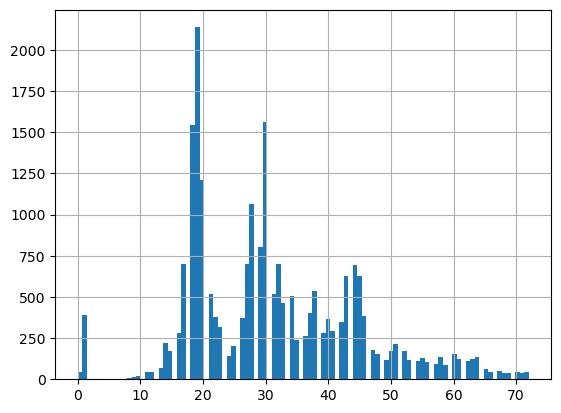

In [27]:
# df['life_sq'].hist(bins=100)
### Completa con tu código aquí
def delete_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[df[column_name].between(lower_bound, upper_bound)]

print(df.loc[:, 'life_sq'].max())
df = delete_outliers(df, 'life_sq')
print(df.loc[:, 'life_sq'].max())

df['life_sq'].hist(bins=100)

###

### Ejercicio 2

Crear una función que permita encontrar las columnas de un `DataFrame` que contengan un gran porcentaje de valores repetidos. (El porcentaje puede ser un parámetro de la función)

Por ejemplo, el esqueleto de la funcion puede ser:
```python
def get_repetitive_columns(df, percent_th=0.95):
```
**Tips de funciones a utilizar:**
  - value_counts

In [55]:
### Completa con tu código aquí
def get_repetitive_columns(df, percent_th=0.95):
    duplicated_columns = []
    total = df.shape[0]
    for col in df.columns:
        duplicated = df[col].duplicated().sum()
        duplicated_percentage = ((duplicated / total)).round(3)
        # print(f'Col: {col} - Total: {total} - Duplicated %: {duplicated_percentage}')
        if (duplicated_percentage >= percent_th):
            duplicated_columns.append(col)
    
    return duplicated_columns
# ###
get_repetitive_columns(df)

# df.info()


    

Col: id - Total: 30471 - Duplicated %: 0.0
Col: timestamp - Total: 30471 - Duplicated %: 0.962
Col: full_sq - Total: 30471 - Duplicated %: 0.993
Col: life_sq - Total: 30471 - Duplicated %: 0.994
Col: floor - Total: 30471 - Duplicated %: 0.999
Col: max_floor - Total: 30471 - Duplicated %: 0.998
Col: material - Total: 30471 - Duplicated %: 1.0
Col: build_year - Total: 30471 - Duplicated %: 0.996
Col: num_room - Total: 30471 - Duplicated %: 1.0
Col: kitch_sq - Total: 30471 - Duplicated %: 0.998
Col: state - Total: 30471 - Duplicated %: 1.0
Col: product_type - Total: 30471 - Duplicated %: 1.0
Col: sub_area - Total: 30471 - Duplicated %: 0.995
Col: area_m - Total: 30471 - Duplicated %: 0.995
Col: raion_popul - Total: 30471 - Duplicated %: 0.995
Col: green_zone_part - Total: 30471 - Duplicated %: 0.995
Col: indust_part - Total: 30471 - Duplicated %: 0.996
Col: children_preschool - Total: 30471 - Duplicated %: 0.995
Col: preschool_quota - Total: 30471 - Duplicated %: 0.996
Col: preschool_educ

['timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekd

### Ejercicio 3

Crear columnas que contengan información del año, mes y día almacenado en la columna `timestamp`

**Tips de funciones a utilizar:**
  - to_datetime

In [62]:
df = pd.read_csv('data/housing.csv', sep=',', header='infer', decimal='.', quotechar='"')

df['year'] = None
df['month'] = None
df['weekday'] = None

### Completa con tu código aquí
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

df.head()[['timestamp', 'year', 'month', 'weekday']]
###


,timestamp,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


### Ejercicio 4

Crear una variable `dummy` para las columnas: `product_type`, `culture_objects_top_25`

**Tips de funciones a utilizar:**
  - get_dummies

In [65]:
### Completa con tu código aquí
dummy = pd.get_dummies(df[['product_type', 'culture_objects_top_25']])

dummy

### 


,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes
0,True,False,True,False
1,True,False,False,True
2,True,False,True,False
3,True,False,True,False
4,True,False,True,False
...,...,...,...,...
30466,True,False,True,False
30467,True,False,False,True
30468,False,True,True,False
30469,True,False,True,False


### Ejercicio 5

Crear una función que normalice los valores de una columna eliminando:
  - la mayusculas
  - los caracteres especiales
  - 
```python
def normalizeWord(word):
    return normalizedWord
```

**Tips de funciones a utilizar:**
  - re.sub (regexSubstitution)
  - lower

In [69]:
import re
s = 'Este &es [un] ejemplo? {de} un##string. con.? carateres especiales!!!!'

### Completa con tu código aquí
def normalizeWord(word):
    normalized = word.lower()
    normalized = re.sub(r'[^a-zA-Z0-9\s]', '', normalized)

    return normalized

print(normalizeWord(s))
###



este es un ejemplo de unstring con carateres especiales
